In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(8103, 28)
(8103, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL is supporting
idxs = np.where(X_relative_footsteps_acc[:, 23] == 0)[0]
X_relative_footsteps_acc_RL_support = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_support = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_RL_support[0, :]

array([ 0.        ,  0.        , -0.1       ,  0.03223521, -0.16707049,
        0.01633024, -0.05086472,  0.01613139, -0.08244775,  0.22421836,
        0.2146329 , -0.40479645,  0.23125328, -0.18591964, -0.40580276,
       -0.2571617 ,  0.15356685, -0.40042184, -0.2596469 , -0.13334387,
       -0.40039383,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_acc_RL_support[0, :]

array([ 0.22407743,  0.18885393,  0.23964177, -0.19926585, -0.26746292,
        0.12131841, -0.25399354, -0.15574807])

### Linear Regression

In [45]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_x = LinearRegression()

# Fit the model
model_rl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9053048473552868
RMSE:  0.0082765715776856
The lowest error is:  2.2255345649702107e-07
The highest error is:  0.041907514002886614
The avg. error is:  0.005750079177769084


In [46]:
model_rl_relative_support_x.coef_

array([[ 0.00690815, -0.09454265,  0.07238637, -0.06137528,  0.00314194,
         0.03069758, -0.4145223 , -0.03434678, -0.48158826,  0.60152257,
         0.33679105,  0.25502551,  0.01344136,  0.12510454]])

In [47]:
model_rl_relative_support_x.intercept_

array([0.13124609])

Text(0, 0.5, 'Predictions')

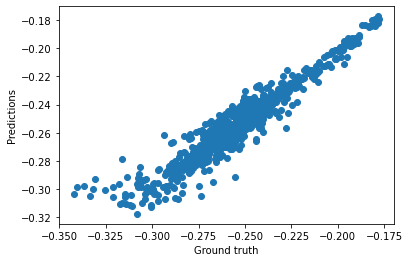

In [48]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [49]:
#%store model_rl_relative_support_x

In [50]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [51]:
# Save model
#joblib.dump(model_rl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_x.sav")

### Predict FL foot -> y

In [62]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_y = LinearRegression()

# Fit the model
model_rl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9498470238510882
RMSE:  0.008703325773900898
The lowest error is:  6.0013361329047665e-06
The highest error is:  0.045230223764123334
The avg. error is:  0.005961640478455417


In [63]:
model_rl_relative_support_y.coef_

array([[-0.01821793, -0.15128806,  0.06779233,  0.0150989 , -0.05224896,
        -0.01256037, -0.13137834, -0.36408493,  0.2548328 , -0.2409816 ,
        -0.23592591,  1.54416878,  0.10601964, -0.02349228]])

In [64]:
model_rl_relative_support_y.intercept_

array([-0.13680925])

Text(0, 0.5, 'Predictions')

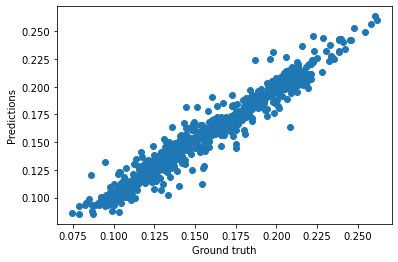

In [65]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [66]:
#%store model_rl_relative_support_y

In [67]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [32]:
# Save model
#joblib.dump(model_rl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_y.sav")